In [7]:
import numpy as np
from power import kmeans, grid
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#inputs used  on the functions kmeans and grid

#number of clusters used on kmeans function
N_g_kmeans = [np.array([1,1]),np.array([1,2]),np.array([1,3]),np.array([2,2]),np.array([1,5]),
          np.array([2,3]),np.array([1,7]),np.array([2,4]),np.array([3,3]),np.array([2,5]),
          np.array([1,11]),np.array([3,4])]

#grid clusters used on grid function
N_g_grid = [np.array([1,1]),np.array([1,2]),np.array([2,2]),
          np.array([2,3]),np.array([2,4]),np.array([3,3])]

#list of number of nodes used
N_node = [120,150,180,210,240]


In [5]:
# list of calls of kmeans function
output_kmeans = [[kmeans(N_g,N_n) for N_g in N_g_kmeans] for N_n in N_node]

# list of calls of grid fucntion
output_grid = [[grid(N_g,N_n) for N_g in N_g_grid] for N_n in N_node]


# DataFrame for regression analysis


## number of clusters as predictor
## transmitted power (from nodes to head) as target

In [13]:
pot_node_c = [pd.concat(
    [pd.DataFrame(
        {'N_grid':N_grid.prod(),'P_nodes': output_kmeans[i][j][0].sum(axis=1)}) 
     for (j,N_grid) in enumerate(N_g_kmeans,0)
    ] ,ignore_index=True
         ) for (i,N_n) in enumerate(N_node,0)]

## number of clusters as predictor
## transmitted power (from heads to base station) as target

In [9]:
pot_head_c = [pd.concat(
    [pd.DataFrame(
        {'N_grid':N_grid.prod(),'P_heads': output_kmeans[i][j][1].sum(axis=1)}) 
     for (j,N_grid) in enumerate(N_g_kmeans,0)
    ] ,ignore_index=True
         ) for (i,N_n) in enumerate(N_node,0)]

## instantiating the Linear Regression class for each DataFrame

In [10]:
reg_node = [LinearRegression() for i in N_node]
reg_head = [LinearRegression() for i in N_node]

In [11]:
N_f = 5 # number of nonlinear features

In [14]:
# creating the supervised data to fit the regression
X= [
    np.array([(pot_node_c[j]['N_grid'])**i for i in range(1,N_f+1)]).T 
    for (j,N_n) in enumerate(N_node,0)
    ]

y_node = [pot_node_c[i]['P_nodes'] for (i,N_n) in enumerate(N_node,0)]

y_head = [pot_head_c[i]['P_heads'] for (i,N_n) in enumerate(N_node,0)]

In [15]:
# fitting the models

for (i,N_n) in enumerate(N_node,0):
    reg_node[i].fit(X[i],y_node[i])
    reg_head[i].fit(X[i],y_head[i])        


In [17]:
# creating input data to plot the regression models 
x_plot = np.linspace(1,len(N_g_kmeans),num=len(N_g_kmeans)) 
x_predict = np.array([x_plot**i for i in range(1,N_f+1)]).T
    

In [18]:
# output of the regression models trasmitted power from nodes to head
y_plot_node = [reg_node[i].predict(x_predict) for i in range(len(N_node))]

In [19]:
# output of the regression models trasmitted power from heads to base station
y_plot_head = [reg_head[i].predict(x_predict) for i in range(len(N_node))]

## plots used in paper

In [20]:
matplotlib.rcParams['text.usetex'] = True

<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2733/1797441612.py:14: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Energy Consumption $(\mathrm{mW})$")


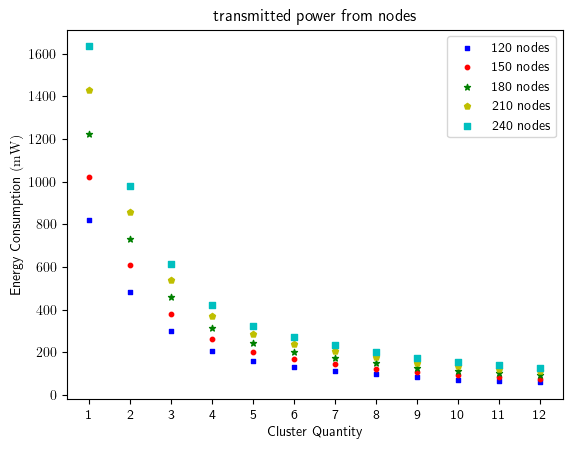

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
x_law =np.linspace(0,12,50)

ax1.scatter(x_plot, y_plot_node[0], s=10, c='b', marker="s", label= "120 nodes")
#ax1.plot(x_plot[1:], y_plot_node[0][0]*np.exp(-Yk[0]*x_plot[1:]) )
ax1.scatter(x_plot,y_plot_node[1], s=10, c='r', marker="o", label= "150 nodes")
#ax1.plot(x_plot[1:], y_plot_node[1][0]*np.exp(-Yk[1]*x_plot[1:]) )
ax1.scatter(x_plot,y_plot_node[2], s=20, c='g', marker="*", label= "180 nodes")
ax1.scatter(x_plot,y_plot_node[3], s=20, c='y', marker="p", label= "210 nodes")
ax1.scatter(x_plot,y_plot_node[4], s=20, c='c', marker="s", label= "240 nodes")
plt.title("transmitted power from nodes")
plt.legend(loc='upper right')
plt.ylabel("Energy Consumption $(\mathrm{mW})$")
plt.xlabel("Cluster Quantity")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], [1,2,3,4,5,6,7,8,9,10,11,12])
plt.savefig('pot_nodes.png', bbox_inches='tight')

In [24]:
xN = np.array([N_g_kmeans[i].prod() for i in range(1,len(N_g_kmeans))])
Yk = [- np.log(y_plot_node[i][1:]/y_plot_node[i][0])/xN for i in range(len(N_node))]

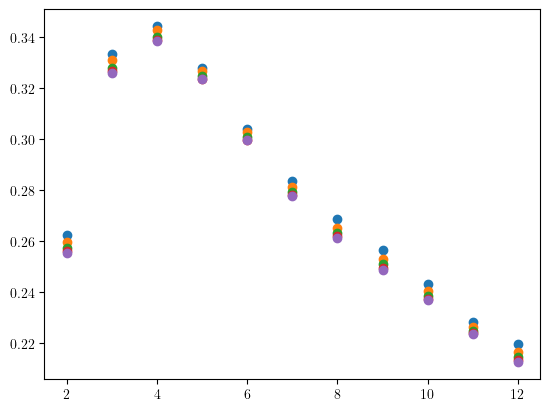

In [25]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

xN = np.arange(2,13)

ax1.scatter(xN,Yk[0])
ax1.scatter(xN,Yk[1])
ax1.scatter(xN,Yk[2])
ax1.scatter(xN,Yk[3])
ax1.scatter(xN,Yk[4])

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2733/629661842.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Energy Consumption $(\mathrm{mW})$")


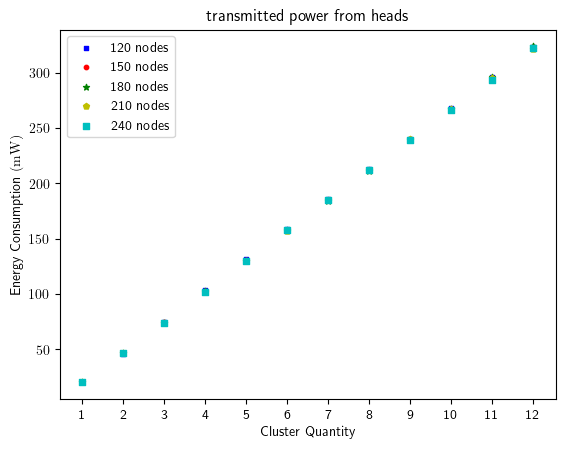

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_plot, y_plot_head[0], s=10, c='b', marker="s", label= "120 nodes")
ax1.scatter(x_plot,y_plot_head[1], s=10, c='r', marker="o", label= "150 nodes")
ax1.scatter(x_plot,y_plot_head[2], s=20, c='g', marker="*", label= "180 nodes")
ax1.scatter(x_plot,y_plot_head[3], s=20, c='y', marker="p", label= "210 nodes")
ax1.scatter(x_plot,y_plot_head[4], s=20, c='c', marker="s", label= "240 nodes")
plt.title("transmitted power from heads")
plt.legend(loc='upper left')
plt.ylabel("Energy Consumption $(\mathrm{mW})$")
plt.xlabel("Cluster Quantity")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], [1,2,3,4,5,6,7,8,9,10,11,12])
plt.savefig('pot_heads.png', bbox_inches='tight')


<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2733/150422282.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Energy Consumption $(\mathrm{mW})$")


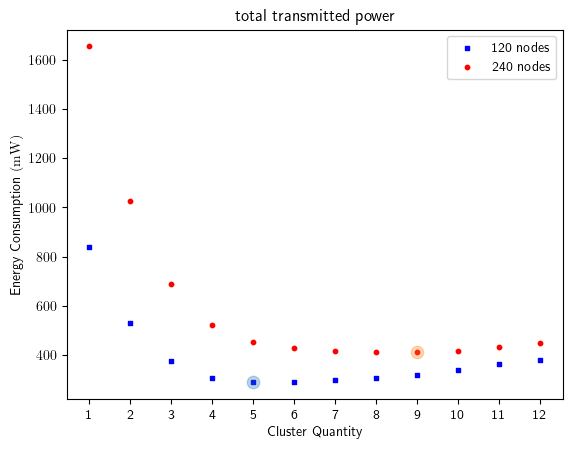

In [27]:
y_plot_tot = np.array(y_plot_node)+np.array(y_plot_head)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_plot, y_plot_tot[0], s=10, c='b', marker="s", label= "120 nodes")
ax1.scatter(5,y_plot_tot[0][4], s =80, alpha = 0.3)
ax1.scatter(x_plot,y_plot_tot[4], s=10, c='r', marker="o", label= "240 nodes")
ax1.scatter(9,y_plot_tot[4][8], s =80, alpha = 0.3)
plt.title("total transmitted power")
plt.legend(loc='upper right')
plt.ylabel("Energy Consumption $(\mathrm{mW})$")
plt.xlabel("Cluster Quantity")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], [1,2,3,4,5,6,7,8,9,10,11,12])
plt.savefig('pot_total.png', bbox_inches='tight')